# Sentiment Analysis for Amazon Reviews

In this notebook, we will perform sentiment analysis on Amazon reviews using a Naive Bayes classifier. 
We will follow these steps:

1. Load the dataset.
2. Preprocess the text data.
3. Train a sentiment classification model.
4. Evaluate the model.
5. Visualize the results.

Note: The amazon_reviews.tsv dataset here is a trimmed down dataset.  You can get more Amazon Review datasets from here: https://www.kaggle.com/datasets/cynthiarempel/amazon-us-customer-reviews-dataset/data

In [1]:
# Run this cell if you cannot get docker to work. 
# !pip install pandas scikit-learn mlxtend transformers matplotlib seaborn pyLDAvis

In [2]:
# Load the dataset
import pandas as pd
import numpy as np

df = pd.read_csv('/mnt/data/amazon_reviews.tsv', sep='\t')

# Display the first few rows of the dataset
df.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5,0,0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0,1,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0,0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0,0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0,0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


## Data Preprocessing

We will clean the text data, tokenize it, and convert it into numerical features using TF-IDF.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

# Function to clean the text
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Clean the review text
df['cleaned_review'] = df['review_body'].apply(clean_text)

# Assign sentiment labels (assuming rating 4 and above is positive, below 4 is negative)
df['sentiment'] = np.where(df['star_rating'] >= 4, 1, 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


## Model Training

We will train a Naive Bayes classifier on the preprocessed text data.


In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict sentiments for the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.7647058823529411
Confusion Matrix:
[[ 0  4]
 [ 0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.76      1.00      0.87        13

    accuracy                           0.76        17
   macro avg       0.38      0.50      0.43        17
weighted avg       0.58      0.76      0.66        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualizing the Results

We will plot the confusion matrix to visualize the performance of our model.


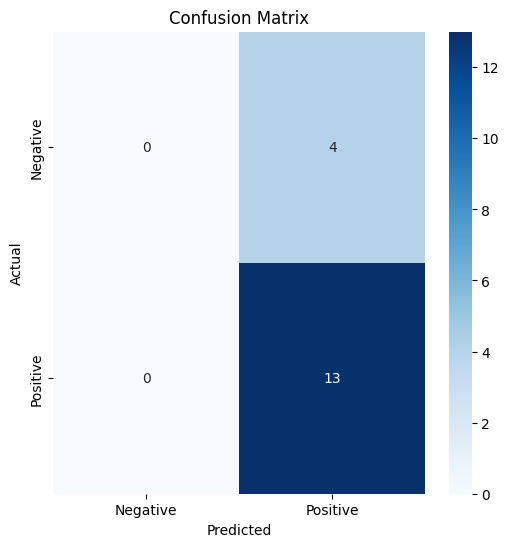

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Use a Pre-built Sentiment Analysis Model

We will use the `distilbert-base-uncased-finetuned-sst-2-english` model from the Hugging Face Transformers library to predict sentiments and compare the results with our Naive Bayes classifier.


In [6]:
from transformers import pipeline

# Load the pre-built sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Predict sentiments using the pre-built model
y_pred_hf = [1 if sentiment_pipeline(review)[0]['label'] == 'POSITIVE' else 0 for review in X_test]

# Evaluate the pre-built model
accuracy_hf = accuracy_score(y_test, y_pred_hf)
conf_matrix_hf = confusion_matrix(y_test, y_pred_hf)
class_report_hf = classification_report(y_test, y_pred_hf)

print(f'Accuracy (Hugging Face): {accuracy_hf}')
print('Confusion Matrix (Hugging Face):')
print(conf_matrix_hf)
print('Classification Report (Hugging Face):')
print(class_report_hf)


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Accuracy (Hugging Face): 0.7058823529411765
Confusion Matrix (Hugging Face):
[[3 1]
 [4 9]]
Classification Report (Hugging Face):
              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.90      0.69      0.78        13

    accuracy                           0.71        17
   macro avg       0.66      0.72      0.66        17
weighted avg       0.79      0.71      0.73        17



## Compare the Results

We will compare the performance of the Naive Bayes classifier with the pre-built Hugging Face model.


Accuracy (Naive Bayes): 0.7647058823529411
Accuracy (Hugging Face): 0.7058823529411765


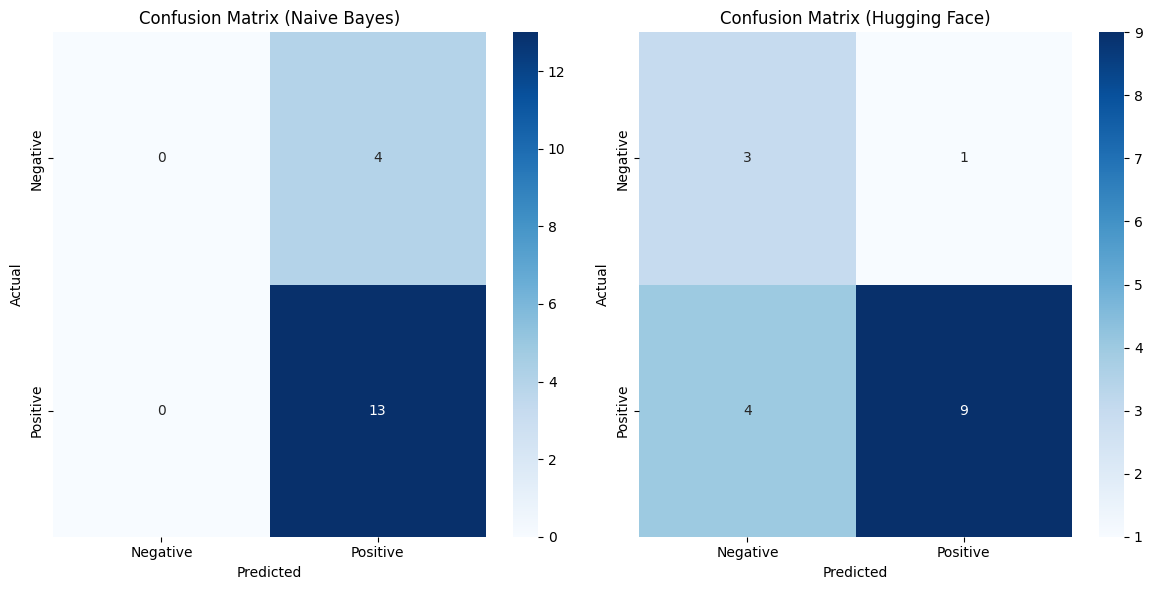

In [7]:
print(f'Accuracy (Naive Bayes): {accuracy}')
print(f'Accuracy (Hugging Face): {accuracy_hf}')

# Visualize confusion matrices side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Naive Bayes confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax[0])
ax[0].set_title('Confusion Matrix (Naive Bayes)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Hugging Face confusion matrix
sns.heatmap(conf_matrix_hf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax[1])
ax[1].set_title('Confusion Matrix (Hugging Face)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


## Visualizing Sentiment Distributions

We will visualize the sentiment distributions predicted by the Naive Bayes classifier and the Hugging Face model.


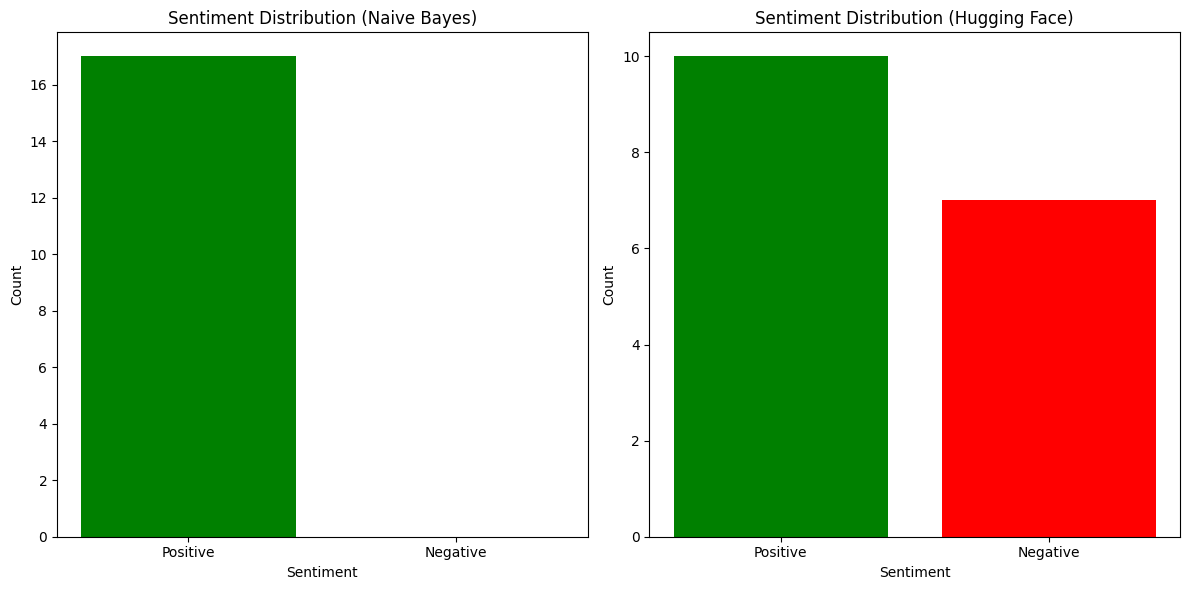

In [8]:
import matplotlib.pyplot as plt

# Calculate sentiment distributions
nb_positive = sum(y_pred)
nb_negative = len(y_pred) - nb_positive

hf_positive = sum(y_pred_hf)
hf_negative = len(y_pred_hf) - hf_positive

# Plot sentiment distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Naive Bayes sentiment distribution
ax[0].bar(['Positive', 'Negative'], [nb_positive, nb_negative], color=['green', 'red'])
ax[0].set_title('Sentiment Distribution (Naive Bayes)')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylabel('Count')

# Hugging Face sentiment distribution
ax[1].bar(['Positive', 'Negative'], [hf_positive, hf_negative], color=['green', 'red'])
ax[1].set_title('Sentiment Distribution (Hugging Face)')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


# Topic Modeling

Topic modeling is an unsupervised learning technique used to identify the underlying themes or topics within a collection of documents. It helps to discover the hidden thematic structure in a large corpus of text. One of the most popular algorithms for topic modeling is Latent Dirichlet Allocation (LDA).

In this section, we will perform topic modeling separately for positive and negative reviews to identify the key topics in each category. The steps involved are:

1. Preprocess the text data for topic modeling.
2. Perform topic modeling using LDA for positive reviews.
3. Perform topic modeling using LDA for negative reviews.
4. Visualize the topics using `pyLDAvis`.

This approach will help us understand the dominant themes in both positive and negative reviews, providing insights into customer feedback.


## Preprocessing for Topic Modeling

We will preprocess the text data separately for positive and negative reviews.


In [9]:
# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 1]['cleaned_review']
negative_reviews = df[df['sentiment'] == 0]['cleaned_review']

# Vectorize the text data using TF-IDF
vectorizer_positive = TfidfVectorizer(max_features=5000, stop_words='english')
vectorizer_negative = TfidfVectorizer(max_features=5000, stop_words='english')

positive_tfidf = vectorizer_positive.fit_transform(positive_reviews)
negative_tfidf = vectorizer_negative.fit_transform(negative_reviews)



## Topic Modeling for Positive Reviews

We will perform topic modeling using Latent Dirichlet Allocation (LDA) to discover the underlying topics in positive reviews.


In [10]:
from sklearn.decomposition import LatentDirichletAllocation

# Topic Modeling for Positive Reviews
n_topics = 5  # Number of topics
lda_positive = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_positive.fit(positive_tfidf)

# Display the topics for positive reviews
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

n_top_words = 10
tf_feature_names_positive = vectorizer_positive.get_feature_names_out()
print("Positive Reviews Topics:")
display_topics(lda_positive, tf_feature_names_positive, n_top_words)



Positive Reviews Topics:
Topic #1:
price kindle cord install great ipod original outstanding did easy

Topic #2:
love nice satisfied unit good works great sounds loud coming

Topic #3:
great battery use easy worked nice needed vacation exactly needs

Topic #4:
good vcccc item works surprised work seller shipping long provide

Topic #5:
great expected savers awesome product life im somuch want family



## Topic Modeling for Negative Reviews

We will perform topic modeling using Latent Dirichlet Allocation (LDA) to discover the underlying topics in negative reviews.


In [11]:
# Topic Modeling for Negative Reviews
lda_negative = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_negative.fit(negative_tfidf)

# Display the topics for negative reviews
print("Negative Reviews Topics:")
tf_feature_names_negative = vectorizer_negative.get_feature_names_out()
display_topics(lda_negative, tf_feature_names_negative, n_top_words)



Negative Reviews Topics:
Topic #1:
failed sucks sounds priced great lot work stores music minimal

Topic #2:
ok good sound use phone speaker doesnt quality charge portable

Topic #3:
scratchy keyed producto excelente works charge compass reliable really pretty

Topic #4:
need plug dvr battery cover ft trip days bought ive

Topic #5:
stars xl fit wouldnt does sound appears items waiting radiobatteriescharger



## Visualizing the Topics

We will visualize the topics using pyLDAvis for both positive and negative reviews.


### Understanding LDA Panels with `pyLDAvis`

#### Key Components of the `pyLDAvis` Panel

1. **Intertopic Distance Map (Left Panel)**:
    - **Purpose**: Shows the distance between topics in a two-dimensional space.
    - **Description**: Each circle represents a topic. The size of the circle is proportional to the prevalence of the topic in the corpus. The distance between circles indicates the similarity between topics—closer circles are more similar.
    - **Interactions**: Hovering over or clicking on a topic circle highlights the relevant terms and updates the right panel to show more detailed information about the selected topic.

2. **Top-30 Most Relevant Terms (Right Panel)**:
    - **Purpose**: Displays the most relevant terms for the selected topic.
    - **Description**: The right panel is a bar chart that shows the top-30 most relevant terms for the selected topic. Relevance is a weighted combination of the term frequency within the topic and the term's exclusivity to the topic.
    - **Interactions**: Hovering over or clicking on different terms in the bar chart highlights those terms in the left panel and updates their relevance scores.

3. **Lambda Slider (Above Right Panel)**:
    - **Purpose**: Adjusts the weighting of term frequency versus term exclusivity when determining term relevance.
    - **Description**: Lambda ranges from 0 to 1. When lambda is set to 1, terms are ranked purely by their frequency within the selected topic. When lambda is set to 0, terms are ranked by their exclusivity to the topic. Adjusting the slider helps explore different aspects of term relevance.

#### Interpreting the LDA Visualization

1. **Identifying Dominant Topics**:
    - Larger circles on the left panel represent more prevalent topics in the corpus. By examining these topics, you can identify the dominant themes in the dataset.

2. **Exploring Topic Similarity**:
    - The distance between circles indicates how similar or different topics are. Topics that are close to each other share more common terms and concepts, while distant topics are more distinct.

3. **Understanding Term Relevance**:
    - The right panel helps in understanding the key terms that define each topic. Adjusting the lambda slider provides insights into whether the terms are frequent within the topic or unique to it.


In [12]:
import pyLDAvis
import pyLDAvis.lda_model

# Prepare the LDA visualization for positive reviews
pyLDAvis.enable_notebook()
panel_positive = pyLDAvis.lda_model.prepare(lda_positive, positive_tfidf, vectorizer_positive)
print("LDA Visualization for Positive Reviews")
pyLDAvis.display(panel_positive)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

LDA Visualization for Positive Reviews


In [13]:
# Prepare the LDA visualization for negative reviews
panel_negative = pyLDAvis.lda_model.prepare(lda_negative, negative_tfidf, vectorizer_negative)
print("LDA Visualization for Negative Reviews")
pyLDAvis.display(panel_negative)

LDA Visualization for Negative Reviews


# Pattern Discovery in Negative Reviews using Apriori Algorithm

In this notebook, we will use the Apriori algorithm to discover patterns of co-occurring words in negative reviews from the Amazon dataset. The Apriori algorithm is a classic algorithm in data mining for learning association rules. It is designed to operate on databases containing transactions (for example, collections of items bought by customers or words appearing in reviews).

The steps involved are:

1. Preprocess the text data to generate word transactions for negative reviews.
2. Apply the Apriori algorithm to discover frequent itemsets of words.
3. Extract association rules from the frequent itemsets.
4. Visualize the top association rules based on lift.

This approach will help us identify common patterns and co-occurrences in the words used in negative reviews, which can provide insights into common issues or themes.


## Preprocessing for Apriori Algorithm

We will preprocess the text data to generate word transactions for negative reviews.


In [14]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Function to tokenize text into a list of words
def tokenize(text):
    return text.split()

# Separate negative reviews
negative_reviews = df[df['sentiment'] == 0]['cleaned_review']

# Tokenize the negative reviews
negative_reviews_tokens = negative_reviews.apply(tokenize)

# Convert the tokenized reviews into a format suitable for the Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(negative_reviews_tokens).transform(negative_reviews_tokens)
negative_reviews_df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the transactions dataframe
negative_reviews_df.head()



,a,able,about,actually,address,advertised,afford,after,alert,all,...,works,worst,worth,would,wouldnt,wrong,xl,yet,you,your
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Applying the Apriori Algorithm

We will use the Apriori algorithm to discover frequent itemsets of words in the negative reviews.


In [ ]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(negative_reviews_df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
frequent_itemsets.head()


## Extracting Association Rules

We will extract association rules from the frequent itemsets to identify patterns of co-occurring words.


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Extract association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the association rules
rules.head()


## Visualizing the Association Rules

We will visualize the top association rules based on lift.


In [ ]:
# Sort the rules by lift
rules = rules.sort_values(by='lift', ascending=False)

# Plot the top 10 association rules
top_rules = rules.head(10)
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_rules)), top_rules['lift'], color='blue')
plt.yticks(range(len(top_rules)), [f"{list(rule['antecedents'])} -> {list(rule['consequents'])}" for rule in top_rules.to_dict('records')])
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.title('Top 10 Association Rules')
plt.gca().invert_yaxis()
plt.show()
